Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [5]:
# loading the dataset to a Pandas DataFrame
dataset = pd.read_csv('heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
# number of rows & columns in the dataset
dataset.shape

(918, 12)

In [7]:
# first 5 rows of the dataset
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# checking for missing values
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data Analysis and Visulaization

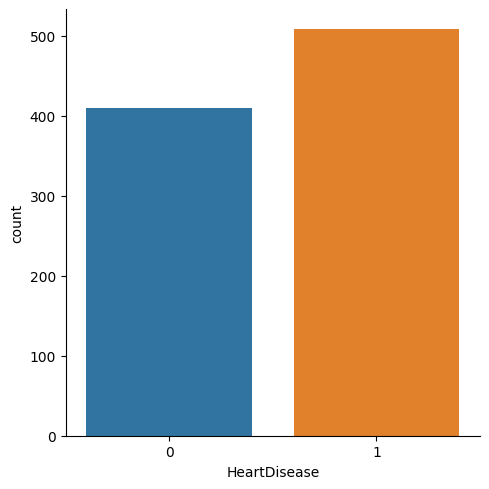

In [9]:

sns.catplot(x='HeartDisease', data = dataset, kind = 'count')

In [10]:
from sklearn.preprocessing import LabelEncoder
dataset['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [11]:
for col in dataset.columns:
    if col=='ST_Slope':
        dataset[col] = dataset[col].apply(lambda x: 0 if x=='Flat' else (1 if x=='Up' else -1))
    elif dataset.dtypes[col]=='object':
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

In [12]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,1,0
1,49,0,2,160,180,0,1,156,0,1.0,0,1
2,37,1,1,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,1,108,1,1.5,0,1
4,54,1,2,150,195,0,1,122,0,0.0,1,0


Correlation

1. Positive Correlation
2. Negative Correlation

In [13]:
correlation = dataset.corr()

<AxesSubplot:>

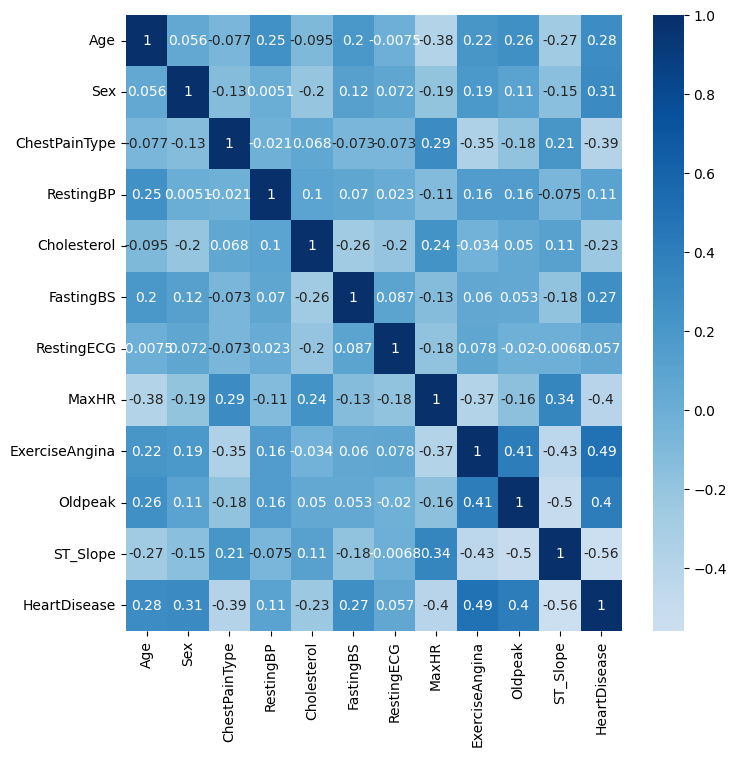

In [14]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), xticklabels=dataset.corr().columns, yticklabels=dataset.corr().columns, cmap='Blues', center=0, annot=True)

Data Preprocessing

In [15]:
# separate the data and Label
X = dataset[['Age', 'Sex', 'ChestPainType', 'FastingBS','ExerciseAngina', 'Oldpeak','ST_Slope']]
X

,Age,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,0,0,0.0,1
1,49,0,2,0,0,1.0,0
2,37,1,1,0,0,0.0,1
3,48,0,0,0,1,1.5,0
4,54,1,2,0,0,0.0,1
...,...,...,...,...,...,...,...
913,45,1,3,0,0,1.2,0
914,68,1,0,1,0,3.4,0
915,57,1,0,0,1,1.2,0
916,57,0,1,0,0,0.0,0


In [16]:
Y = dataset['HeartDisease']

In [17]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


Train & Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(Y.shape, Y_train.shape, Y_test.shape)

(918,) (734,) (184,)


Model Training:

Random Forest Classifier

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy Score

In [22]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8641304347826086


Building a Predictive System

In [25]:
input_data = (40,1,1,1,0,2,1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Your heart is at risk, Consult a doctor immideately')
else:
  print('Healthy condition, But remember to maintain fitness')

[0]
Healthy condition, But remember to maintain fitness


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
file='boby'
pickle.dump(model(file,'wb'))